# Name: Nandini Kongani
# CWID: 20020621
# Assignment Number: 03
# Assignment Name: HW_03_knn


In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load data
data = pd.read_csv('breast-cancer-wisconsin.data.csv')

In [3]:
# Finding out the missing values
mv=data.isin(['?']).sum()
print(mv)

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [4]:
# Data cleaning
data.replace('?', pd.NA, inplace=True)  # Replace missing values
data.dropna(inplace=True)  # Drop rows with missing values
data['F6'] = pd.to_numeric(data['F6'])  # Convert F6 to numeric

# Convert 'Class' from numerical to categorical
data['Class'] = pd.Categorical(data['Class'])

In [5]:
# Features and target variable seperation 
# Assuming 'Sample code number' is the first column and 'Class' is the last column
# Select columns from the second to the second-last
X = data.drop(columns = ['Sample','F1','F2','F3','F4','F5','F6','F7','F8','F9']) #all the features except the class
y = data['Class'] #defining only the target variable

In [6]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: category
Categories (2, int64): [2, 4]

In [7]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [8]:
# Split data into training and testing data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle = True)
y_train.head()
X_train.head()
y_test.head()

444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: category
Categories (2, int64): [2, 4]

In [9]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ks = [3, 5, 10]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    target_prediction = knn.predict(X_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(y_test,target_prediction ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 1.0%

Accuracy of model with k = 5: 1.0%

Accuracy of model with k = 10: 1.0%



In [10]:
cm=confusion_matrix(y_test, target_prediction)
print('Confusion Matrix')
print(confusion_matrix(y_test, target_prediction))
print()
print('Accuracy score')
print(accuracy_score(y_test, target_prediction))
print()
print('Classification Report')
print(classification_report(y_test, target_prediction))

Confusion Matrix
[[133   0]
 [  0  72]]

Accuracy score
1.0

Classification Report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       133
           4       1.00      1.00      1.00        72

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [11]:
# target_pred.head()
X_test['target_pred']=target_prediction
# print(target_test)
X_test['target_actual']= y_test
X_test.head()

,Class,target_pred,target_actual
429,0.0,2,NaN
23,0.0,2,NaN
189,0.0,2,NaN
47,1.0,4,2
361,0.0,2,4


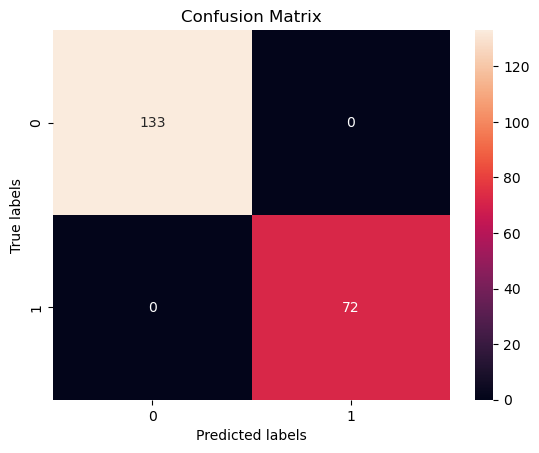

In [12]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
